# Machine learning with KNN and Naive Bayes 

In [24]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline



In [3]:
#Code to download the data set from MNIST#
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target


X = X / 255.0


shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]



test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


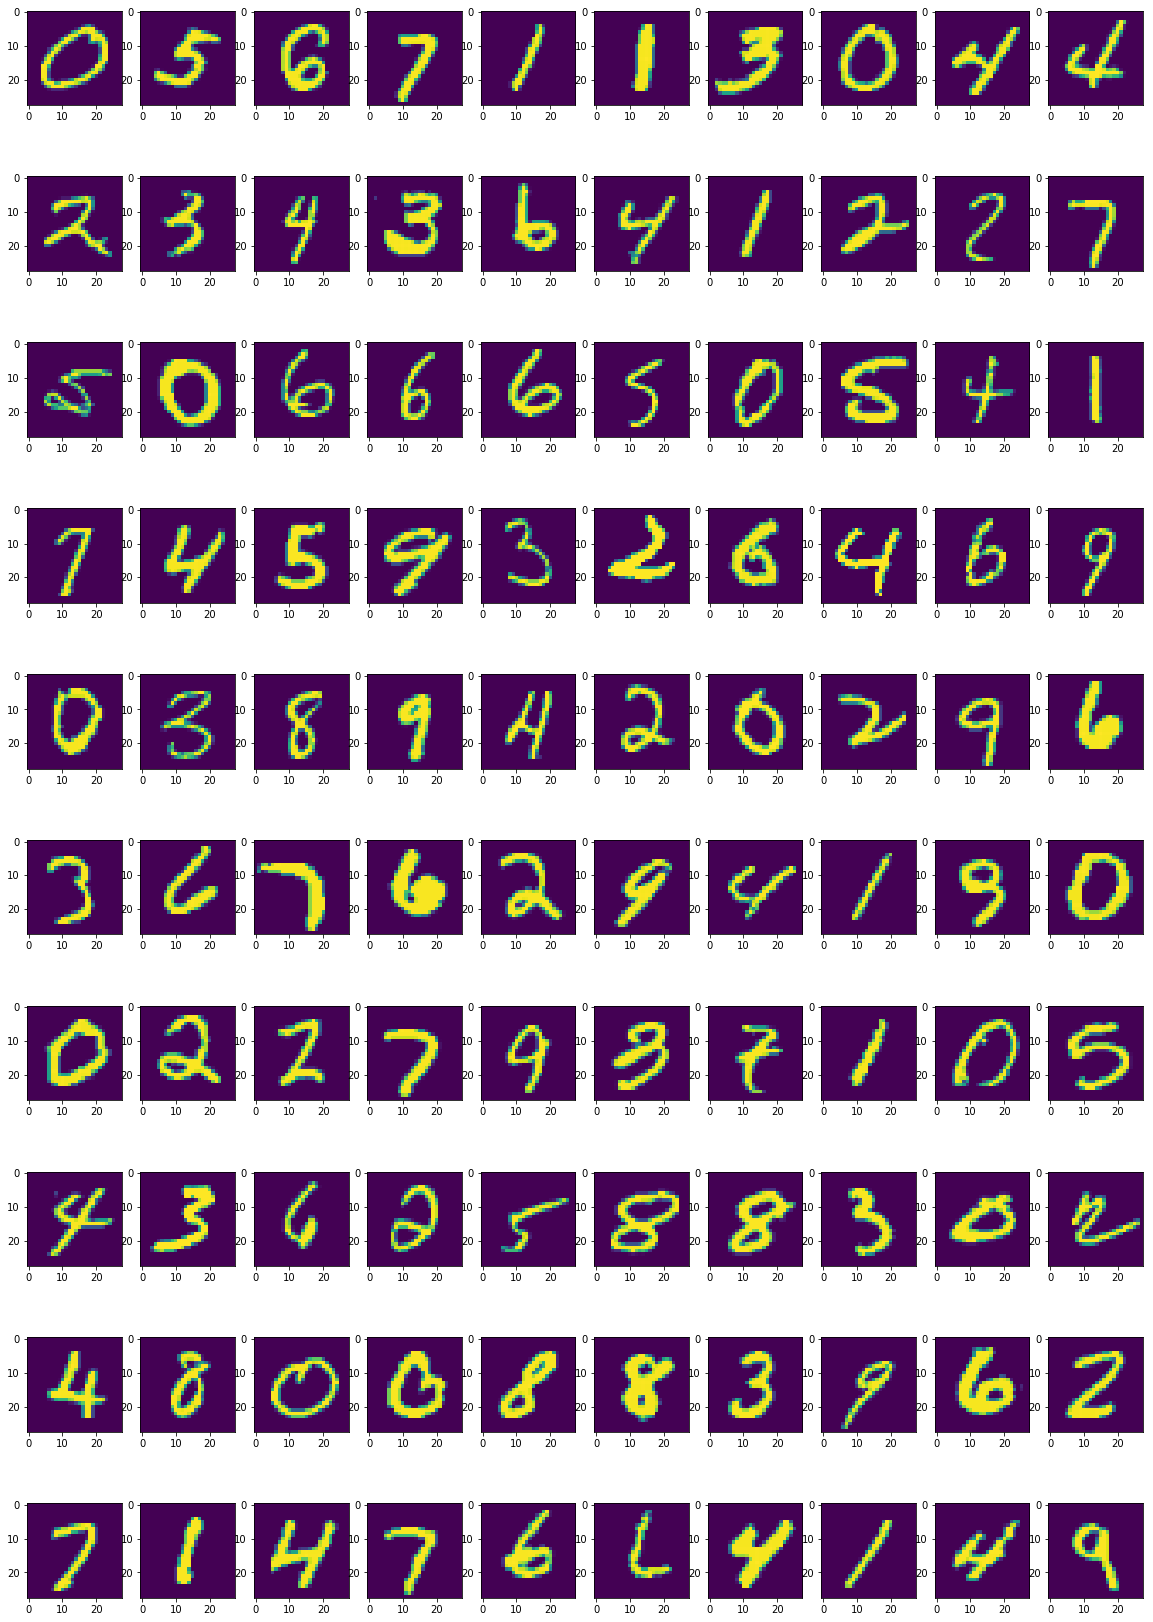

In [6]:
def P1(num_examples=10):

    ff,AXES = plt.subplots(num_examples,num_examples, figsize = (20,30))
    for iii in range(num_examples):
        T = 10*iii
        for ii in range(num_examples):
            myarray = X[T+ii].reshape([28,28])
            AXES[iii,ii].imshow(myarray)

P1(10)

In [9]:
def P2(k_values):


    for xx in k_values:
        KNNClass = KNeighborsClassifier(xx)
        KNNClass.fit(mini_train_data, mini_train_labels )
        prediction = KNNClass.predict(dev_data)
        print("This is a KNN Classifier for K_Nearest Neighbour =", xx)
        print(f1_score(dev_labels, prediction), end ='')

k_values = [1, 3, 5, 7, 9]
P2(k_values)

This is a KNN Classifier for K_Nearest Neighbour = 1


NameError: name 'f1_score' is not defined

In [10]:
def P3(train_sizes, accuracies):


    for trainsize in train_sizes:
        train_dataX = train_data [:trainsize]
        train_labelsX = train_labels [:trainsize]
        KNNClass = KNeighborsClassifier(1)
        t1 = time.time()
        KNNClass.fit(train_dataX, train_labelsX )
        prediction = KNNClass.predict(dev_data)
        t2 = time.time()
        
        

        #This is the loop function that evaluates the accuracy of the KNN algorithm#
        correct, total = 0, 0
        for pred, label in zip(prediction, dev_labels):
            if pred == label: 
                correct += 1
            total += 1
        print ("The accuracy of the training-size=", trainsize, "is", correct/total, "And the time it took is=", t2-t1, "s")
        accuracies.append(correct/total)
    return(accuracies)


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

The accuracy of the training-size= 100 is 0.702 And the time it took is= 0.10907292366027832 s
The accuracy of the training-size= 200 is 0.766 And the time it took is= 0.21456098556518555 s
The accuracy of the training-size= 400 is 0.833 And the time it took is= 0.44948887825012207 s
The accuracy of the training-size= 800 is 0.878 And the time it took is= 0.8821330070495605 s
The accuracy of the training-size= 1600 is 0.901 And the time it took is= 1.7134249210357666 s
The accuracy of the training-size= 3200 is 0.927 And the time it took is= 3.5646629333496094 s
The accuracy of the training-size= 6400 is 0.941 And the time it took is= 7.9002768993377686 s
The accuracy of the training-size= 12800 is 0.962 And the time it took is= 17.162896871566772 s
The accuracy of the training-size= 25000 is 0.972 And the time it took is= 36.3718159198761 s


[0.702, 0.766, 0.833, 0.878, 0.901, 0.927, 0.941, 0.962, 0.972]

In [11]:
def P4():

    KNNClass = KNeighborsClassifier(1)
    KNNClass.fit(train_data, train_labels)
    prediction = KNNClass.predict(dev_data)
    cnf_matrix = confusion_matrix(dev_labels, prediction)
    print(cnf_matrix)


P4()

[[110   0   1   0   0   0   0   0   0   0]
 [  0 106   0   0   0   0   0   0   0   0]
 [  0   1  98   2   0   0   0   3   0   0]
 [  0   0   0 101   0   0   0   0   0   0]
 [  0   1   0   0  85   0   0   0   0   1]
 [  0   0   0   0   0  89   1   0   0   2]
 [  1   0   0   0   0   0  81   0   0   0]
 [  0   0   0   0   0   0   0 104   0   4]
 [  0   1   0   1   0   1   0   1 105   0]
 [  0   0   0   0   3   0   0   1   1  95]]


In [12]:
from scipy.ndimage.filters import gaussian_filter

#This is how a real gaussian blur can be used to blur and invert an image
for ii in range(len(train_data)):
    blurry_train = train_data.copy()
    blurry_train[ii] = gaussian_filter(train_data[ii], sigma=1) 
ff,AXES = plt.subplots(1,2, figsize = (10,10))
AXES[0].imshow(blurry_train[4].reshape([28,28]))
AXES[1].imshow(train_data[4].reshape([28,28]))

NameError: name 'blurry_train' is not defined

In [13]:
from scipy.ndimage.filters import gaussian_filter

def P6():
    


    #The first step is to blur the train and dev np arrays using the gaussian_filter and arbitrary sigma =3#
    blurry_train = train_data.copy()
    blurry_dev= dev_data.copy()
    for ii in range(len(train_data)):
        blurry_train[ii] = gaussian_filter(train_data[ii], sigma=3)
    for iii in range(len(dev_data)):
        blurry_dev[iii] = gaussian_filter(dev_data[iii], sigma=3)
    
    #Once blurred the KNN can then be used to fit the matrix of combinations of blurry/non-blurry train/dev np arrays#
    KNNClass = KNeighborsClassifier(1)
    KNNClass.fit(blurry_train, train_labels )
    prediction = KNNClass.predict(dev_data)
    print("This is a KNN Classifier for K_Nearest Neighbour with Gaussian Train data with KNN = 1")
    print(classification_report(prediction, dev_labels), end ='')
    
    
    KNNClass.fit(train_data, train_labels )
    prediction = KNNClass.predict(blurry_dev)
    print("This is a KNN Classifier for K_Nearest Neighbour with Gaussian dev data with KNN = 1")
    print(classification_report(prediction, dev_labels), end ='')
    
    
    KNNClass.fit(blurry_train, train_labels )
    prediction = KNNClass.predict(blurry_dev)
    print("This is a KNN Classifier for K_Nearest Neighbour with Gaussian dev and trian data with KNN = 1")
    print(classification_report(prediction, dev_labels), end ='')


P6()

This is a KNN Classifier for K_Nearest Neighbour with Gaussian Train data with KNN = 1
             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       112
        1.0       1.00      0.95      0.97       112
        2.0       0.93      0.98      0.96        99
        3.0       0.99      0.94      0.97       106
        4.0       0.98      1.00      0.99        85
        5.0       0.95      1.00      0.97        87
        6.0       1.00      0.95      0.98        86
        7.0       0.98      0.96      0.97       110
        8.0       0.92      0.99      0.95       101
        9.0       0.97      0.95      0.96       102

avg / total       0.97      0.97      0.97      1000
This is a KNN Classifier for K_Nearest Neighbour with Gaussian dev data with KNN = 1
             precision    recall  f1-score   support

        0.0       0.81      1.00      0.90        90
        1.0       0.98      0.73      0.84       142
        2.0       0.87      0.

In [16]:
#Bernoulli Naive Bayes
def P8(alphas):


    #Binarizing the np array using the simple code below
    YY = train_data.copy()
    YY[YY > 0.5] = 1
    YY[YY <= 0.5] = 0
    

    XXX = dev_data.copy()
    XXX[XXX > 0.5] = 1
    XXX[XXX <= 0.5] = 0
    
    #Looping through the alpha values using a for loop
    for ii in alphas['alpha']:
        
        Bern = BernoulliNB(alpha = ii)
        Bern.fit(YY, train_labels)
        predict = Bern.predict(XXX)
        correct, total = 0, 0
        for pred, label in zip(predict, dev_labels):
            if pred == label: 
                correct += 1
            total += 1
        print ("The accuracy of the training-size with Bernoulli-NB is =", correct/total, "at alpha value =", ii)


alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
import random

def P10(num_examples):

    YY = train_data.copy()
    YY[YY > 0.5] = 1
    YY[YY <= 0.5] = 0
    

    
    Bern= BernoulliNB()
    YX = Bern.fit(YY, train_labels)
    YYYY = np.exp(YX.feature_log_prob_)
    
    
    ###Putting together a random variable selection and then plotting the resultant probability as defined in the probability feature table###
    Numbers = []
    for iii in range(num_examples):
        nums= [0,1,2,3,4,5,6,7,8,9]
        random.shuffle(nums)
        Numbers.extend(nums)
    
    
    ff,AXES = plt.subplots(num_examples,int(num_examples/2), figsize = (20,30))
    i=0
    ii=0
    for iii in range(len(Numbers)):
        myarray = YYYY[int(Numbers[iii])].reshape([28,28])
        AXES[ii,i].imshow(myarray)
        i+= 1
        if (i>9):
            i= 0
            ii += 1

P10(20)

# Natural Language Processing with Logistic regression

In [14]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

In [31]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

In [17]:
count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)


pred=[]

KNNClass = KNeighborsClassifier(50)
KNNClass.fit(YYY, train_labels)
pred = KNNClass.predict(YYZ)
print("This is a KNN Classifier for K_Nearest_Neighbour =", 50)
print(metrics.f1_score(test_labels, pred, average = 'micro'), end ='')

This is a KNN Classifier for K_Nearest_Neighbour = 50
0.441654357459

In [18]:
count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)

def Transformation(k_values):
    for ii in k_values:
        KNNClass = KNeighborsClassifier(ii)
        KNNClass.fit(YYY, train_labels)
        pred = KNNClass.predict(YYZ)
        print("This is a KNN Classifier for K_Nearest_Neighbour =", ii)
        print(metrics.f1_score(test_labels, pred, average = 'micro'))
        
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,30,40,50,100,1000,2000]
Transformation(k_values)

This is a KNN Classifier for K_Nearest_Neighbour = 1
0.415066469719
This is a KNN Classifier for K_Nearest_Neighbour = 3
0.375184638109
This is a KNN Classifier for K_Nearest_Neighbour = 5
0.388478581979
This is a KNN Classifier for K_Nearest_Neighbour = 7
0.3988183161
This is a KNN Classifier for K_Nearest_Neighbour = 9
0.404726735598
This is a KNN Classifier for K_Nearest_Neighbour = 11
0.410635155096
This is a KNN Classifier for K_Nearest_Neighbour = 13
0.416543574594
This is a KNN Classifier for K_Nearest_Neighbour = 15
0.42540620384
This is a KNN Classifier for K_Nearest_Neighbour = 17
0.420974889217
This is a KNN Classifier for K_Nearest_Neighbour = 19
0.419497784343
This is a KNN Classifier for K_Nearest_Neighbour = 21
0.416543574594
This is a KNN Classifier for K_Nearest_Neighbour = 23
0.400295420975
This is a KNN Classifier for K_Nearest_Neighbour = 25
0.416543574594
This is a KNN Classifier for K_Nearest_Neighbour = 27
0.432791728213
This is a KNN Classifier for K_Nearest_Nei

In [19]:
def MultiBernoulli(alphas):
    
    for ii in alphas['alpha']:
        MBern = MultinomialNB(alpha = ii)
        MBern.fit(YYY, train_labels)
        predict = MBern.predict(YYZ)

        correct, total = 0, 0
        for pred, label in zip(predict, test_labels):
            if pred == label: 
                correct += 1
            total += 1
        print ("The accuracy of the training-size with Multinomial Bernoulli NB and ", "alpha = ", ii,"is ",  correct/total)

count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = MultiBernoulli(alphas)

The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.0 is  0.4194977843426883
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.0001 is  0.7740029542097489
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.001 is  0.7784342688330872
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.01 is  0.7813884785819794
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.1 is  0.7769571639586411
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  0.5 is  0.7695716395864106
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  1.0 is  0.7666174298375185
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  2.0 is  0.7592319054652881
The accuracy of the training-size with Multinomial Bernoulli NB and  alpha =  10.0 is  0.7104874446085672


/Users/taiwoalabi/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


In [25]:
def Logistic_Regress2(Regular_Strength):
    ##Running a Logistic Regression Model###
    TT = []
    RR= []
        
    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    XXX= YY.coef_
        
        
    for iii in range(XXX.shape[0]):
        UU= sum(XXX[iii]**2)
        TT.append(UU)
        RR.append(ii)
    True1= np.vstack((TT,RR))
    True1= True1.transpose()
    Column_Names= ['Sum_of_Squared_Weight', 'C-Strength']
    True2 = pd.DataFrame(True1,columns= Column_Names)
    print(True2)
count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)

Regular_Strength = [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
nb = Logistic_Regress2(Regular_Strength)

   Sum_of_Squared_Weight  C-Strength
0              24.357030         0.0
1              23.623126         0.0
2              26.145871         0.0
3              22.424105         0.0


In [26]:
def WordTokenizer(words):
    
    ###Creating a word tokenizer preprocessor function that accepts and processes a group of words-Sentence###
    words1= words.split(' ')
    words3= []
    for words2 in words1:
        
        b = re.compile(r'^\d+$')
        c = re.compile(r'^\w+$')
        d = re.compile(r'^\_+$')
        e = re.compile(r'^\*+$')
        f = re.compile(r'^\-+$')
        if b.search(str(words2)) != None:
            words3.append('999')
        elif c.search(str(words2)) != None:
            if d.search(str(words2)) != None:
                words3.append('')
            elif e.search(str(words2)) != None:
                words3.append('')
            elif f.search(str(words2)) != None:
                words3.append('')
            else:
                words3.append(words2.lower())
    return ' '.join(words3)

In [30]:
count_vect= CountVectorizer(preprocessor= WordTokenizer)
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)
    
LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
YY = LG.fit(YYY, train_labels)
predict = LG.predict(YYZ)
correct, total = 0, 0
for pred, label in zip(predict, test_labels):
    if pred == label: 
        correct += 1
    total += 1
print ("The accuracy of the training-size with Logistic Regression+Tokenizer function is",  correct/total)

The accuracy of the training-size with Logistic Regression+Tokenizer function is 0.6750369276218612
